In [1]:
import pandas as pd
import time
import datetime
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]


In [4]:
df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Nov 24, 2018",4347.69,4413.09,3795.16,3880.76,4679500000,67495633205
1,"Nov 23, 2018",4360.70,4396.42,4195.68,4347.11,4871490000,75598851166
2,"Nov 22, 2018",4611.57,4629.64,4365.64,4365.94,4569370000,75919439809
3,"Nov 21, 2018",4465.54,4675.73,4343.98,4602.17,6120120000,80020171047
4,"Nov 20, 2018",4863.93,4951.61,4272.11,4451.87,8428290000,77401044320


In [5]:
df=df.assign(Date=pd.to_datetime(df['Date']))

In [6]:
df.loc[df['Volume']=="-",'Volume']=0

In [7]:
df['Volume'] = df['Volume'].astype('int64')

In [8]:
df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-11-24,4347.69,4413.09,3795.16,3880.76,4679500000,67495633205
1,2018-11-23,4360.70,4396.42,4195.68,4347.11,4871490000,75598851166
2,2018-11-22,4611.57,4629.64,4365.64,4365.94,4569370000,75919439809
3,2018-11-21,4465.54,4675.73,4343.98,4602.17,6120120000,80020171047
4,2018-11-20,4863.93,4951.61,4272.11,4451.87,8428290000,77401044320


In [9]:
df.describe()

,Open*,High,Low,Close**,Volume,Market Cap
count,2037.000000,2037.000000,2037.000000,2037.000000,2.037000e+03,2.037000e+03
mean,2281.368041,2349.971703,2203.656195,2283.011546,1.437460e+09,3.777383e+10
std,3441.868997,3567.183017,3288.771138,3441.485215,3.035411e+09,5.858582e+10
min,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.784112e+08
25%,320.390000,328.910000,312.630000,320.510000,1.866810e+07,4.382114e+09
50%,597.280000,606.820000,586.370000,597.150000,5.789390e+07,8.120057e+09
75%,2590.570000,2685.190000,2516.330000,2589.600000,1.183870e+09,4.249500e+10
max,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.265025e+11


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


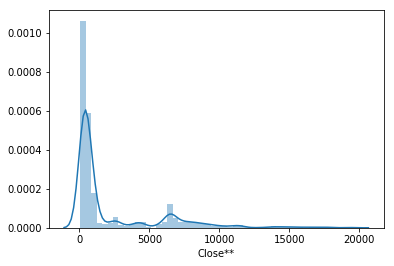

In [10]:
sns.distplot(df['Close**'])

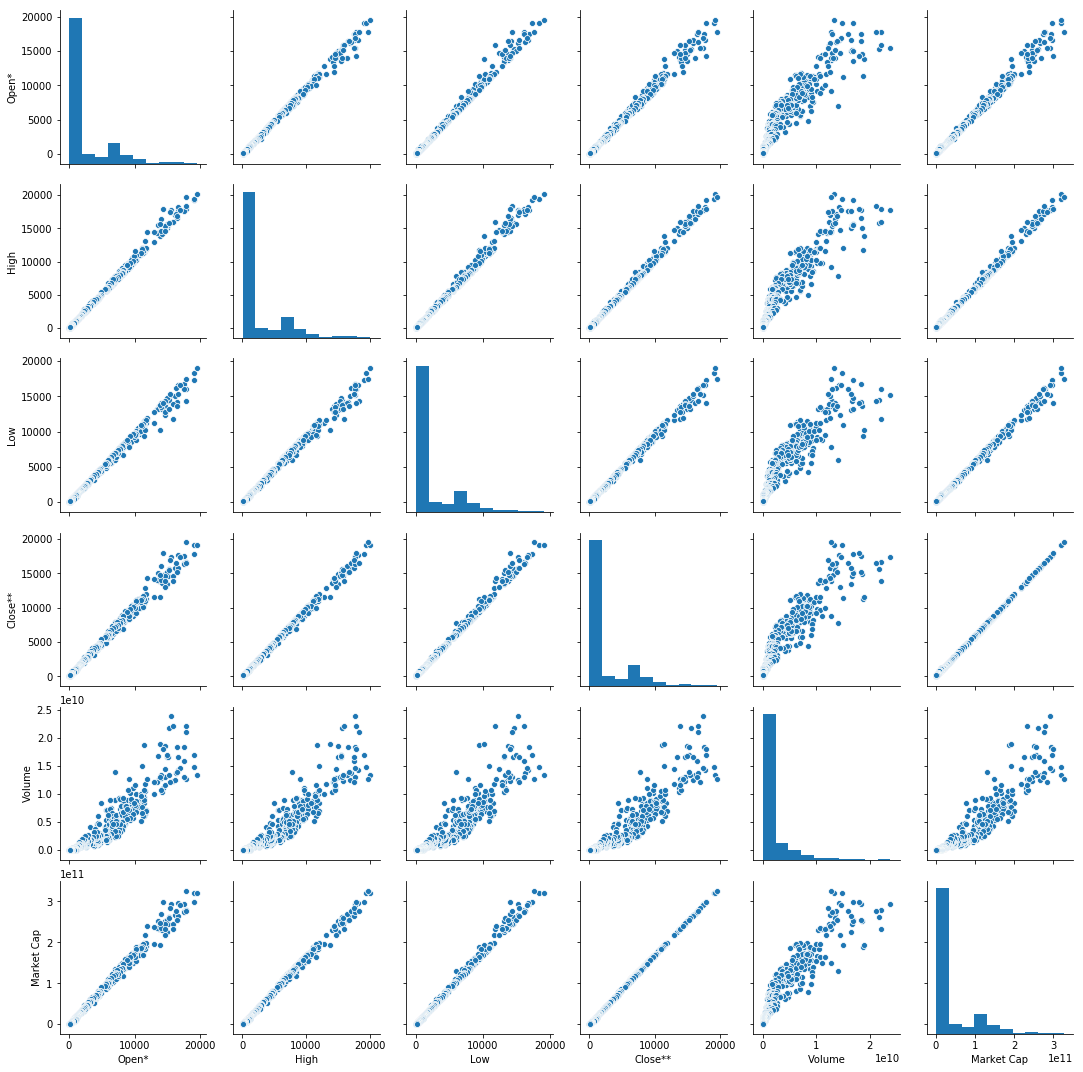

In [11]:
sns.pairplot(df)

Text(0, 0.5, 'Close Price')

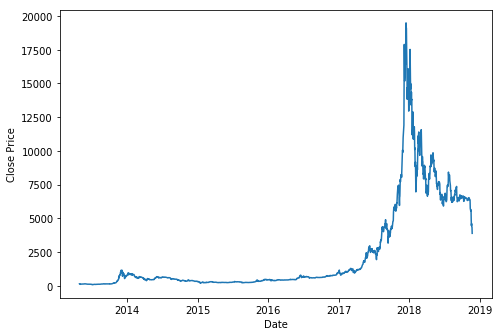

In [12]:
fig=plt.figure()
aax=fig.add_axes([0,0,1,1])
aax.plot(df['Date'],df['Close**'])
aax.set_xlabel('Date')
aax.set_ylabel('Close Price')


Text(0, 0.5, 'Volume')

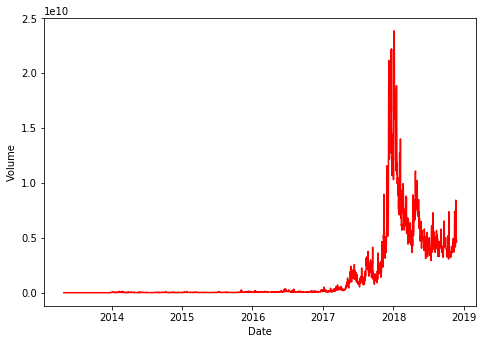

In [13]:
fig=plt.figure()
aax=fig.add_axes([0,0,1,1])
aax.plot(df['Date'],df['Volume'],color='red')
aax.set_xlabel('Date')
aax.set_ylabel('Volume')

In [14]:
btc = { 'Day_dif': lambda df1: (df1['Close**']-df1['Open*'])/df1['Open*']}
df = df.assign(**btc)
df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap,Day_dif
0,2018-11-24,4347.69,4413.09,3795.16,3880.76,4679500000,67495633205,-0.107397
1,2018-11-23,4360.70,4396.42,4195.68,4347.11,4871490000,75598851166,-0.003116
2,2018-11-22,4611.57,4629.64,4365.64,4365.94,4569370000,75919439809,-0.053264
3,2018-11-21,4465.54,4675.73,4343.98,4602.17,6120120000,80020171047,0.030597
4,2018-11-20,4863.93,4951.61,4272.11,4451.87,8428290000,77401044320,-0.084718


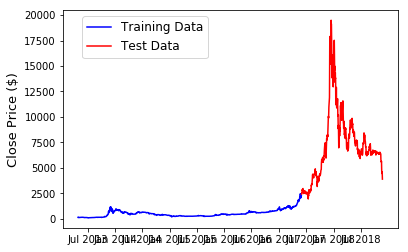

In [15]:
s_date='2017-06-01'
s2_date='2014-06-01'
fig,(ax1)=plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])
ax1.plot(df[df['Date'] < s_date]['Date'].astype(datetime.datetime),
        df[df['Date'] < s_date]['Close**'], 
         color='blue', label='Training Data')
ax1.plot(df[df['Date'] >= s_date]['Date'].astype(datetime.datetime),
         df[df['Date'] >= s_date]['Close**'], 
         color='red', label='Test Data')
ax1.set_ylabel('Close Price ($)',fontsize=13)
ax1.legend(bbox_to_anchor=(0.04, 1), loc=2, borderaxespad=0.5, prop={'size': 12})
plt.show()


In [16]:
for i in df: 
    kwargs = { 'Close_off_high': lambda x: 2*(x['High']- x['Close**'])/(x['High']-x['Low'])-1,
            'Volatility': lambda x: (x['High']- x['Low'])/(x['Open*'])}
    df = df.assign(**kwargs)

df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap,Day_dif,Close_off_high,Volatility
0,2018-11-24,4347.69,4413.09,3795.16,3880.76,4679500000,67495633205,-0.107397,0.722946,0.142128
1,2018-11-23,4360.70,4396.42,4195.68,4347.11,4871490000,75598851166,-0.003116,-0.508718,0.046034
2,2018-11-22,4611.57,4629.64,4365.64,4365.94,4569370000,75919439809,-0.053264,0.997727,0.057247
3,2018-11-21,4465.54,4675.73,4343.98,4602.17,6120120000,80020171047,0.030597,-0.556534,0.074291
4,2018-11-20,4863.93,4951.61,4272.11,4451.87,8428290000,77401044320,-0.084718,0.470905,0.139702


In [17]:
training_set, test_set = df[(df['Date']<s_date) & (df['Date']>s2_date) ], df[df['Date']>=s_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [18]:
window_len =10

In [19]:
LSTM_training_ip = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in ['Close**','Volume']:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_ip.append(temp_set)
LSTM_training_outputs = (training_set['Close**'][window_len:].values/training_set['Close**'][:-window_len].values)-1

In [20]:
LSTM_test_ip = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in ['Close**','Volume']:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] -1 
    LSTM_test_ip.append(temp_set)
LSTM_test_outputs = (test_set['Close**'][window_len:].values/test_set['Close**'][:-window_len].values)-1

In [21]:
LSTM_training_ip[0]

,Open*,High,Low,Close**,Volume,Market Cap,Day_dif,Close_off_high,Volatility
542,2187.19,2311.08,2145.57,0.000000,0.000000,37414813240,0.045364,-0.701891,0.075672
543,2255.36,2301.96,2124.57,-0.048521,-0.065289,35594903085,-0.035422,0.426123,0.078653
544,2159.43,2307.05,2107.17,-0.013471,-0.356159,36901102917,0.044540,-0.485291,0.092561
545,2054.08,2267.34,2054.08,-0.057124,-0.257433,35264171110,0.049521,0.046047,0.103823
546,2196.27,2260.20,1855.83,-0.108266,0.100755,33347170525,-0.071667,0.094691,0.184117
547,2320.89,2573.79,2071.99,-0.036734,0.141537,36017660894,-0.051045,0.480151,0.216210
548,2446.24,2763.71,2285.30,0.008122,0.557906,37690456715,-0.057746,0.917727,0.195570
549,2321.37,2523.72,2321.37,0.068767,0.116874,39952841999,0.052671,-0.208500,0.087168
550,2191.56,2320.82,2178.50,0.014875,-0.107507,37933704066,0.058798,-0.994379,0.064940
551,2043.19,2303.90,2017.87,-0.049427,0.257239,35525744380,0.063729,-0.087508,0.139992


In [22]:
LSTM_training_ip = [np.array(LSTM_training_ip) for LSTM_training_ip in LSTM_training_ip]
LSTM_training_ip = np.array(LSTM_training_ip)

LSTM_test_ip = [np.array(LSTM_test_ip) for LSTM_test_ip in LSTM_test_ip]
LSTM_test_ip = np.array(LSTM_test_ip)

In [32]:
from keras import applications
from keras import metrics
from keras.models import Model
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import backend as K
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.backend.tensorflow_backend import set_session
from keras import optimizers
from keras.utils.generic_utils import get_custom_objects

units=50
reg=1

def sighyper(x):
    return (2*K.exp(x)+K.exp(2*x)-1)/(K.exp(x)+K.exp(-x)+K.exp(-2*x)+1)

get_custom_objects().update({'sighyper': Activation(sighyper)})

def build_model(inputs, output_size, neurons, loss="mean_squared_error", optimizer="sgd"):
  
    model = Sequential()
    model.add(Conv1D(activation='relu', input_shape=(inputs.shape[1], inputs.shape[2]), strides=3, filters=8, kernel_size=20))
    model.add(Dropout(0.25))
    model.add(Conv1D( strides=4, filters=nb_features, kernel_size=16))

    model.compile(loss=loss, optimizer=optimizer,metrics =["mae"])
    return model


In [ ]:
np.random.seed(202)
bit_model = build_model(LSTM_training_ip, output_size=1, neurons = 30)
LSTM_training_outputs = (training_set['Close**'][window_len:].values/training_set['Close**'][:-window_len].values)-1
bit_history = bit_model.fit(LSTM_training_ip, LSTM_training_outputs, 
                            epochs=10, batch_size=2, verbose=2, shuffle=False)



NameError: name 'bit_history' is not defined

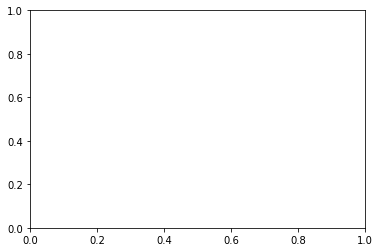

In [34]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(bit_history.epoch, bit_history.history['loss'])
ax1.set_title('Training Error')

if bit_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()


In [ ]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [3,6,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [3,6,9]])
ax1.plot(df[df['Date']>= s_date]['Date'][10:].astype(datetime.datetime),
         test_set['Close**'][window_len:], label='Actual')
ax1.plot(df[df['Date']>= s_date]['Date'][10:].astype(datetime.datetime),
         ((np.transpose(bit_model.predict(LSTM_test_ip))+1) * test_set['Close**'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bit_model.predict(LSTM_test_ip))+1)-\
            (test_set['Close**'].values[window_len:])/(test_set['Close**'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set',fontsize=13)
ax1.set_ylabel('Bitcoin Price',fontsize=12)
ax1.set_xlabel('Date',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 9})
plt.show()
